# Exercici 2


In [19]:
import pandas as pd
import numpy as np


In [20]:
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [36]:

print(movies_df['Year'].isna().sum())




0


In [37]:

movies_df['Year'] = movies_df['Year'].fillna(0)



In [38]:

movies_df['Year'] = movies_df['Year'].astype(int)

In [50]:

# Separar la columna 'Genres' per a cada gènere i crear una nova columna amb la llista de gèneres

movies_df['Title'] = movies_df['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

movies_df['Genre'] = movies_df['genres'].apply(lambda x: x[0])

final_df = movies_df[['Title', 'Year', 'Genre']]


final_df = movies_df.copy()

final_df.drop_duplicates(subset="Title", inplace=True, ignore_index=True)



In [51]:
# Check if all movies are unique
if not final_df['Title'].is_unique:
    print('There are duplicate movies in the dataset')
else:
    print('All movies are unique')


All movies are unique


In [57]:
# Explorar les dades

final_df.to_csv('final_df.csv', index=False)
final_df.head()

,Title,Year,Genre
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy


# Exercici 3


In [61]:
import matplotlib.pyplot as plt
# Comptar el nombre de pel·lícules per any
movie_count_by_year = movies_df.groupby('Year').size()
movie_count_by_year

Year
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Length: 81, dtype: int64

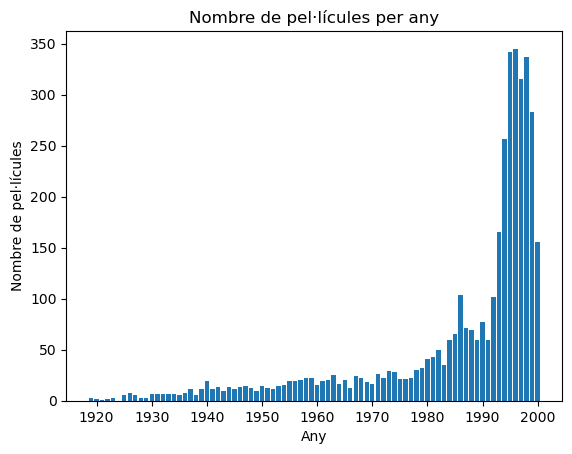

In [65]:
# Crear la gràfica de barres
plt.bar(movie_count_by_year.index, movie_count_by_year.values)
plt.title('Numero de pel·lícules per any')
plt.xlabel('Any')
plt.ylabel('Numero de pel·lícules')
plt.show()

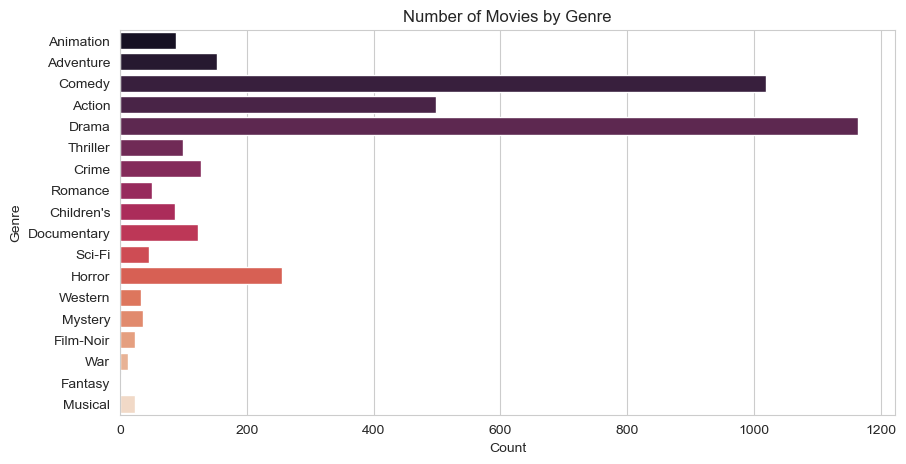

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot showing the count of movies by genre
plt.figure(figsize=(10, 5))
sns.countplot(data=final_df, y='Genre', palette='rocket')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Number of Movies by Genre')

plt.show()

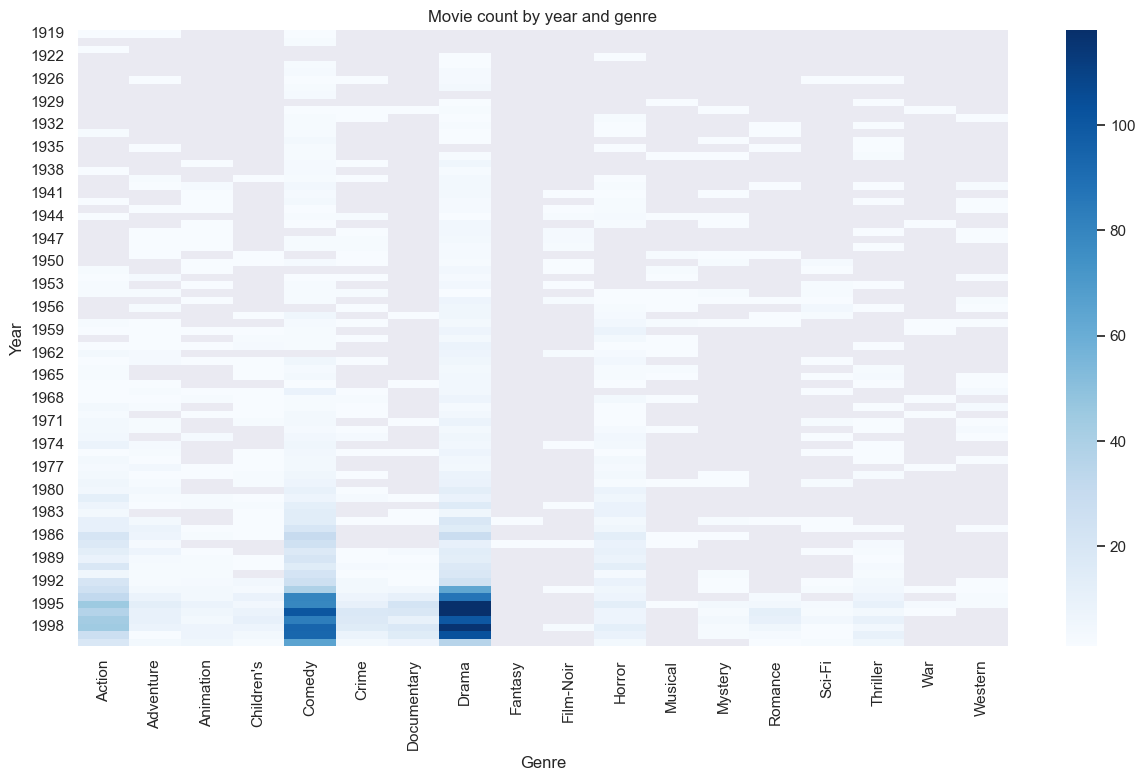

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with movie count by year and genre
movie_count_pivot = movies_df.pivot_table(index='Year', columns='Genre', values='Title', aggfunc='count')

# Create a heatmap with the pivot table
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(movie_count_pivot, cmap='Blues')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Year')
plt.title('Movie count by year and genre')
plt.show()
